In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report


In [3]:
iris = load_iris()

In [5]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [6]:
df['target']= iris.target

In [7]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
df['target'].value_counts()

,count
target,
0,50
1,50
2,50


In [11]:
df['species']= iris.target
df['species']= df['species'].apply(lambda x: iris.target_names[x])


In [12]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [14]:
df = df.drop(columns='target')

In [15]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


**-------------------KNN--------------------------**

**Definicao de X e Y**

In [20]:
X = df.drop(columns='species')
y = df['species']

**Divisão Treino e teste**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)

**Padronização Standard Scaler ou Normalizacao MinMaxScaler**

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Grid Search para esolher o melhor valor de K**

In [30]:
from sklearn.model_selection import GridSearchCV


In [34]:
param_grid = {'n_neighbors': [1, 2, 3, 5, 7, 9, 11, 13, 15]}

knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid.fit(X_train, y_train)




GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 5, 7, 9, 11, 13, 15]},
             scoring='accuracy')

In [35]:
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 5}
0.975


**Escolhe e treina o Modelo de KNN**

In [36]:
knn = KNeighborsClassifier(n_neighbors=5)


**Treinamento**

In [37]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

**Previsoes**

In [38]:
y_pred = knn.predict(X_test_scaled)


**Avaliação**

In [40]:
classification = classification_report(y_test, y_pred)
print(classification)


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



**Matriz de Confusão**

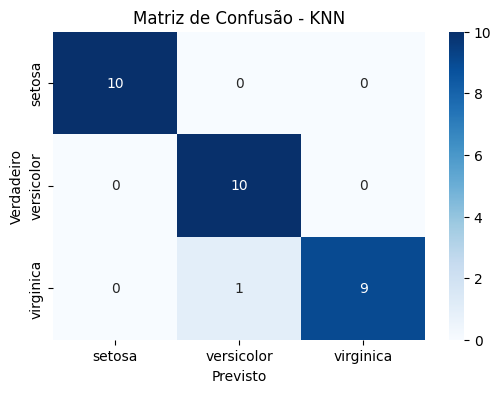

In [41]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title("Matriz de Confusão - KNN")
plt.ylabel("Verdadeiro")
plt.xlabel("Previsto")
plt.show()

**---------------------Algoritmo nao supervisionado K-means**

Definião de X

In [43]:
X = df.drop(columns='species', axis=1)



**Escalonaento de X**

In [46]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Escolha do K ideal com o metodo do cotovelo**

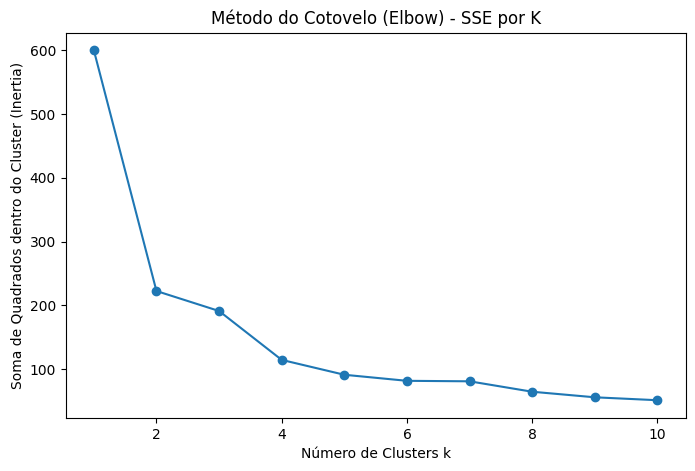

In [48]:
# Método do Cotovelo para escolher K
sse = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_values, sse, '-o')
plt.title("Método do Cotovelo (Elbow) - SSE por K")
plt.xlabel("Número de Clusters k")
plt.ylabel("Soma de Quadrados dentro do Cluster (Inertia)")
plt.show()